# Escape velocity profile

This notebook demonstrates the calculation of the gravitational potential and escape velocity of a halo with an NFW density profile. These two quantities are related through

$$v_\mathrm{esc}(r) = \sqrt{2|\phi(r)|}$$

In [1]:
import profiley
profiley.__version__

'2.0.0a11'

For nicer layout (just comment out if you prefer)

In [2]:
try:
    from plottery.plotutils import update_rcParams

    update_rcParams()
except ImportError:
    print("plottery not installed, skipping")

Some standard imports

In [3]:
from matplotlib import pyplot as plt, ticker
import numpy as np

and the `profiley` profile of choice:

In [4]:
from profiley.nfw import NFW

In [5]:
nfw = NFW(1e14, 5, 0.1, overdensity=200, background="c")
nfw

NFW profile object containing 1 profiles
shape: (1,)
  overdensity: 200c
  log10 mass/Msun = 14.00
  concentration = 5.00
  redshift = 0.10

The radii at which to calculate the escape velocity, let's say from 0 to 5 Mpc. Let's also calculate $r_{200}$ for reference

In [6]:
r = np.linspace(0.01, 10, 100)
r200 = nfw.rdelta(200, "c")
r200

array([1.04212094])

/home/cristobal/anaconda3/envs/profiley/lib/python3.13/site-packages/matplotlib/cbook.py:1709: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.isfinite(val)
/home/cristobal/anaconda3/envs/profiley/lib/python3.13/site-packages/matplotlib/text.py:1475: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = float(self.convert_xunits(x))


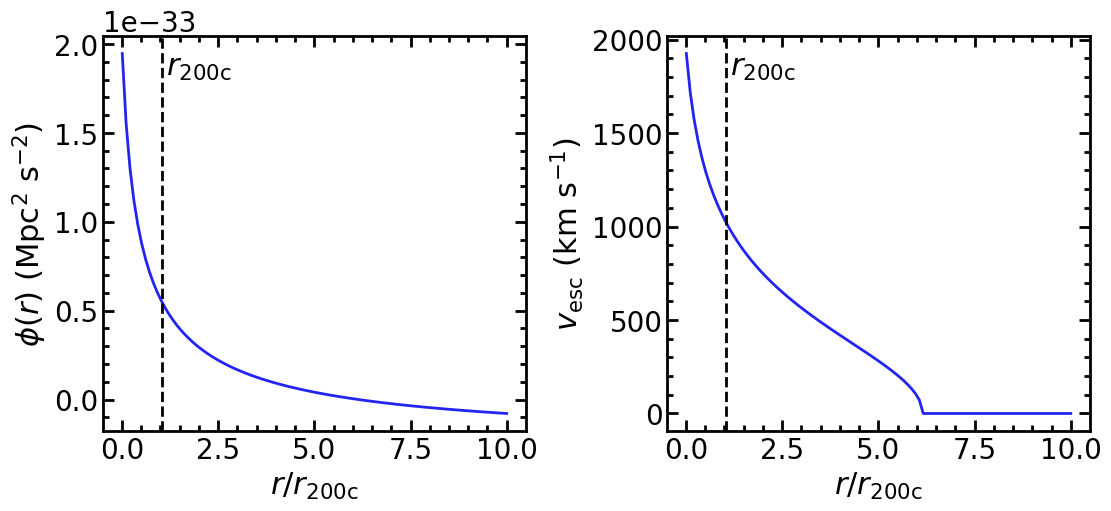

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5), layout="constrained")
ax = axes[0]
phi = nfw.potential(r)
ax.plot(r, phi)
ax.set(ylabel="$\\phi(r)$ (Mpc$^2$ s$^{-2}$)")
ax = axes[1]
v_esc = nfw.escape_velocity(r)
ax.plot(r, v_esc)
ax.set(ylabel="$v_\\mathrm{esc}$ (km s$^{-1}$)")
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
for ax, y in zip(axes, (phi, v_esc)):
    ax.axvline(r200, color="k", ls="--")
    ax.annotate("$r_\\mathrm{200c}$", (r200 + 0.1, np.max(y)), va="top", ha="left")
    ax.set(xlabel="$r/r_\\mathrm{200c}$");

Note how the potential becomes negative at a given radius. This corresponds to the equivalence radius, $r_\mathrm{eq}$, corresponding to the radius at which the pull from the gravitational potential is balanced by the push from the expansion of the Universe (see [Miller et al. 2016](https://ui.adsabs.harvard.edu/abs/2016ApJ...822...41M/abstract)). The escape velocity is set to zero at radii where $\phi<0$.

In fact this equivalence radius is stored in the `equivalence_radius` attribute or, for convenience, its alias `r_eq`:

In [8]:
nfw.equivalence_radius, nfw.r_eq

(array([6.15332662]), array([6.15332662]))

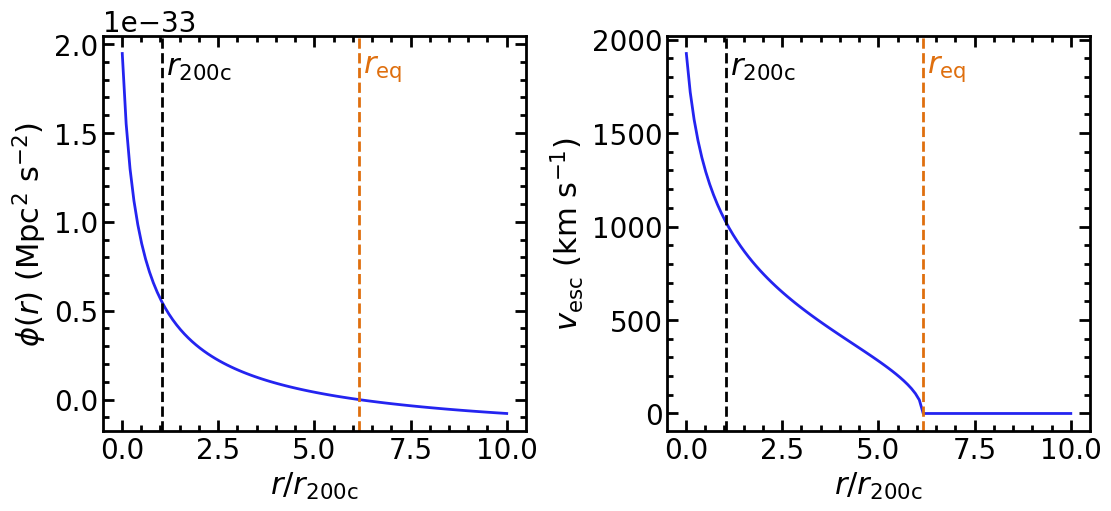

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5), layout="constrained")
ax = axes[0]
phi = nfw.potential(r)
ax.plot(r, phi)
ax.set(ylabel="$\\phi(r)$ (Mpc$^2$ s$^{-2}$)")
ax = axes[1]
v_esc = nfw.escape_velocity(r)
ax.plot(r, v_esc)
ax.set(ylabel="$v_\\mathrm{esc}$ (km s$^{-1}$)")
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
for ax, y in zip(axes, (phi, v_esc)):
    ax.axvline(r200, color="k", ls="--")
    ax.annotate("$r_\\mathrm{200c}$", (r200+0.1, np.max(y)), va="top", ha="left")
    ax.axvline(nfw.equivalence_radius, color="C1", ls="--")
    ax.annotate("$r_\\mathrm{eq}$", (nfw.r_eq + 0.1, np.max(y)), va="top", ha="left", color="C1")
    ax.set(xlabel="$r/r_\\mathrm{200c}$");

Let's compare this to the profiles of a truncated NFW profile, for reference:

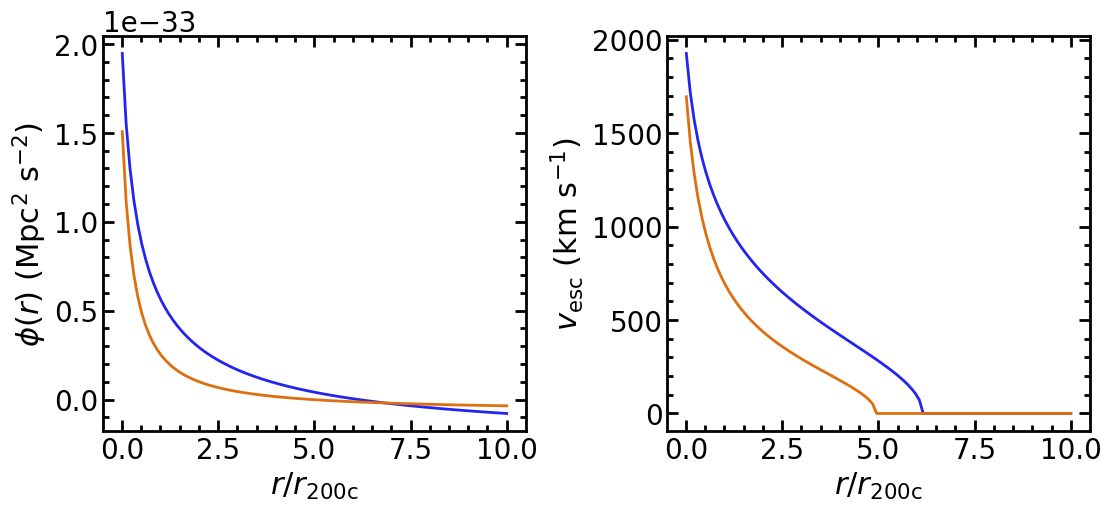

In [11]:
from profiley.nfw import TNFW

tnfw = TNFW(1e14, 5, 0.1, tau=3, overdensity=200, background="c")

fig, axes = plt.subplots(1, 2, figsize=(11, 5), layout="constrained")
ax = axes[0]
ax.plot(r, nfw.potential(r), label="NFW")
ax.plot(r, tnfw.potential(r), label="TNFW")
ax.set(ylabel="$\\phi(r)$ (Mpc$^2$ s$^{-2}$)")
ax = axes[1]
ax.plot(r, nfw.escape_velocity(r), label="NFW")
ax.plot(r, tnfw.escape_velocity(r), label="TNFW")
ax.set(ylabel="$v_\\mathrm{esc}$ (km s$^{-1}$)")
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
for ax, y in zip(axes, (phi, v_esc)):
    ax.set(xlabel="$r/r_\\mathrm{200c}$");